## 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer. 

### (a) The sample size n is extremely large, and the number of predictors p is small. 
With a large sample size 𝑛 and few predictors 𝑝, a flexible statistical learning method is advisable due to the ability to capture complex patterns without overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small. 
With a large number of predictors 𝑝 and few observations 𝑛, an inflexible statistical learning method is advisable to avoid overfitting and ensure better generalization.

### (c) The relationship between the predictors and response is highly non-linear. 
A flexible statistical learning method is advisable to capture complex patterns.

### (d) The variance of the error terms, i.e. 𝜎2= 𝑉𝑎𝑟(𝜖), is extremely high. 
An inflexible statistical learning method is advisable to avoid capturing noise and to ensure better generalization.


## 2. We now revisit the bias-variance decomposition. 

### (a) Provide a sketch of typical (squared) bias, variance, training error, and test error, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be four curves. Make sure to label each one. 

![Bias_and_variance_contributing_to_total_error](https://commons.wikimedia.org/wiki/Special:FilePath/Bias_and_variance_contributing_to_total_error.png)

### (b) Explain why each of the four curves has the shape displayed in part (a). 

The variance increases upwards indicating that as models become more complex, they tend to over-fit the data. The bias curve decreases downwards, showing that simpler models may not capture the complexities of the data, which means under-fitting. If we can find the right balance between model complexity and accuracy then we will get the Optimum model complexity.

## 3. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for 𝑌when 𝑋1= 𝑋2 =𝑋3 = 0. using 𝐾-nearest neighbors. 

![](../img/Assignment_1_3.png)

### (a)	Compute the Euclidean distance between each observation and the test point, 𝑋1= 𝑋2 =𝑋3 = 0. 

3,	2,	$\sqrt10$,	$\sqrt15$, $\sqrt2$, $\sqrt3$

### (b)	What is our prediction with 𝐾= 1? Why? 

Red ,the nearest neighbor is 2 and it’s color is red

### (c)	What is our prediction with 𝐾= 3? Why? 

Green ,the 3 nearest neighbor are 4,5,6, two of them are Green

### (d)	If the ideal decision boundary (with the smallest test error) in this problem is highly nonlinear, then would we expect the best value for 𝐾 to be large or small? Why? 


K should be smaller because a smaller  K  allows the model to better capture the complexity of the data. 

## 4. Use the Auto data set for this problem. Make sure that the missing values have been removed from the data. 

In [11]:
from ISLP import load_data # load the Auto data
Auto = load_data('Auto')
print(Auto.columns)
print(type(Auto))

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [12]:
Auto.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


### (a)	Which of the predictors are quantitative, and which are qualitative? 

mpg: miles per gallon

cylinders: Number of cylinders between 4 and 8

displacement: Engine displacement (cu. inches)

horsepower: Engine horsepower

weight: Vehicle weight (lbs.)

acceleration: Time to accelerate from 0 to 60 mph (sec.)

year: Model year (modulo 100)

origin: Origin of car (1. American, 2. European, 3. Japanese)

name: Vehicle name

The quantitative predictors are mpg, cylinders, displacement, horsepower, weight, acceleration, and year. The qualitative predictor is  origin.

### (b) What is the range of each quantitative predictor? 

In [13]:
Auto_quant = Auto[['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'year']]
for i in range(len(Auto_quant.columns)):
    print(Auto_quant.columns[i], Auto_quant[Auto_quant.columns[i]].min(), Auto_quant[Auto_quant.columns[i]].max())

mpg 9.0 46.6
cylinders 3 8
displacement 68.0 455.0
horsepower 46 230
weight 1613 5140
acceleration 8.0 24.8
year 70 82


### (c) What is the mean and standard deviation of each quantitative predictor? 

In [14]:
for i in range(len(Auto_quant.columns)):
    print(Auto_quant.columns[i], Auto_quant[Auto_quant.columns[i]].std(ddof=1))

mpg 7.8050074865717995
cylinders 1.7057832474527845
displacement 104.64400390890466
horsepower 38.49115993282849
weight 849.4025600429492
acceleration 2.758864119188082
year 3.6837365435778295


### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains? 

In [15]:
Auto_removed = Auto_quant.drop(Auto.index[9:84])
for i in range(len(Auto_removed.columns)):
    print(Auto_removed.columns[i], Auto_removed[Auto_removed.columns[i]].std(ddof=1))

mpg 7.9312638011514744
cylinders 1.6373150538451873
displacement 95.88267356607997
horsepower 34.06670989916368
weight 794.4575276845941
acceleration 2.570792392267652
year 2.9961338169581837


### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings. 

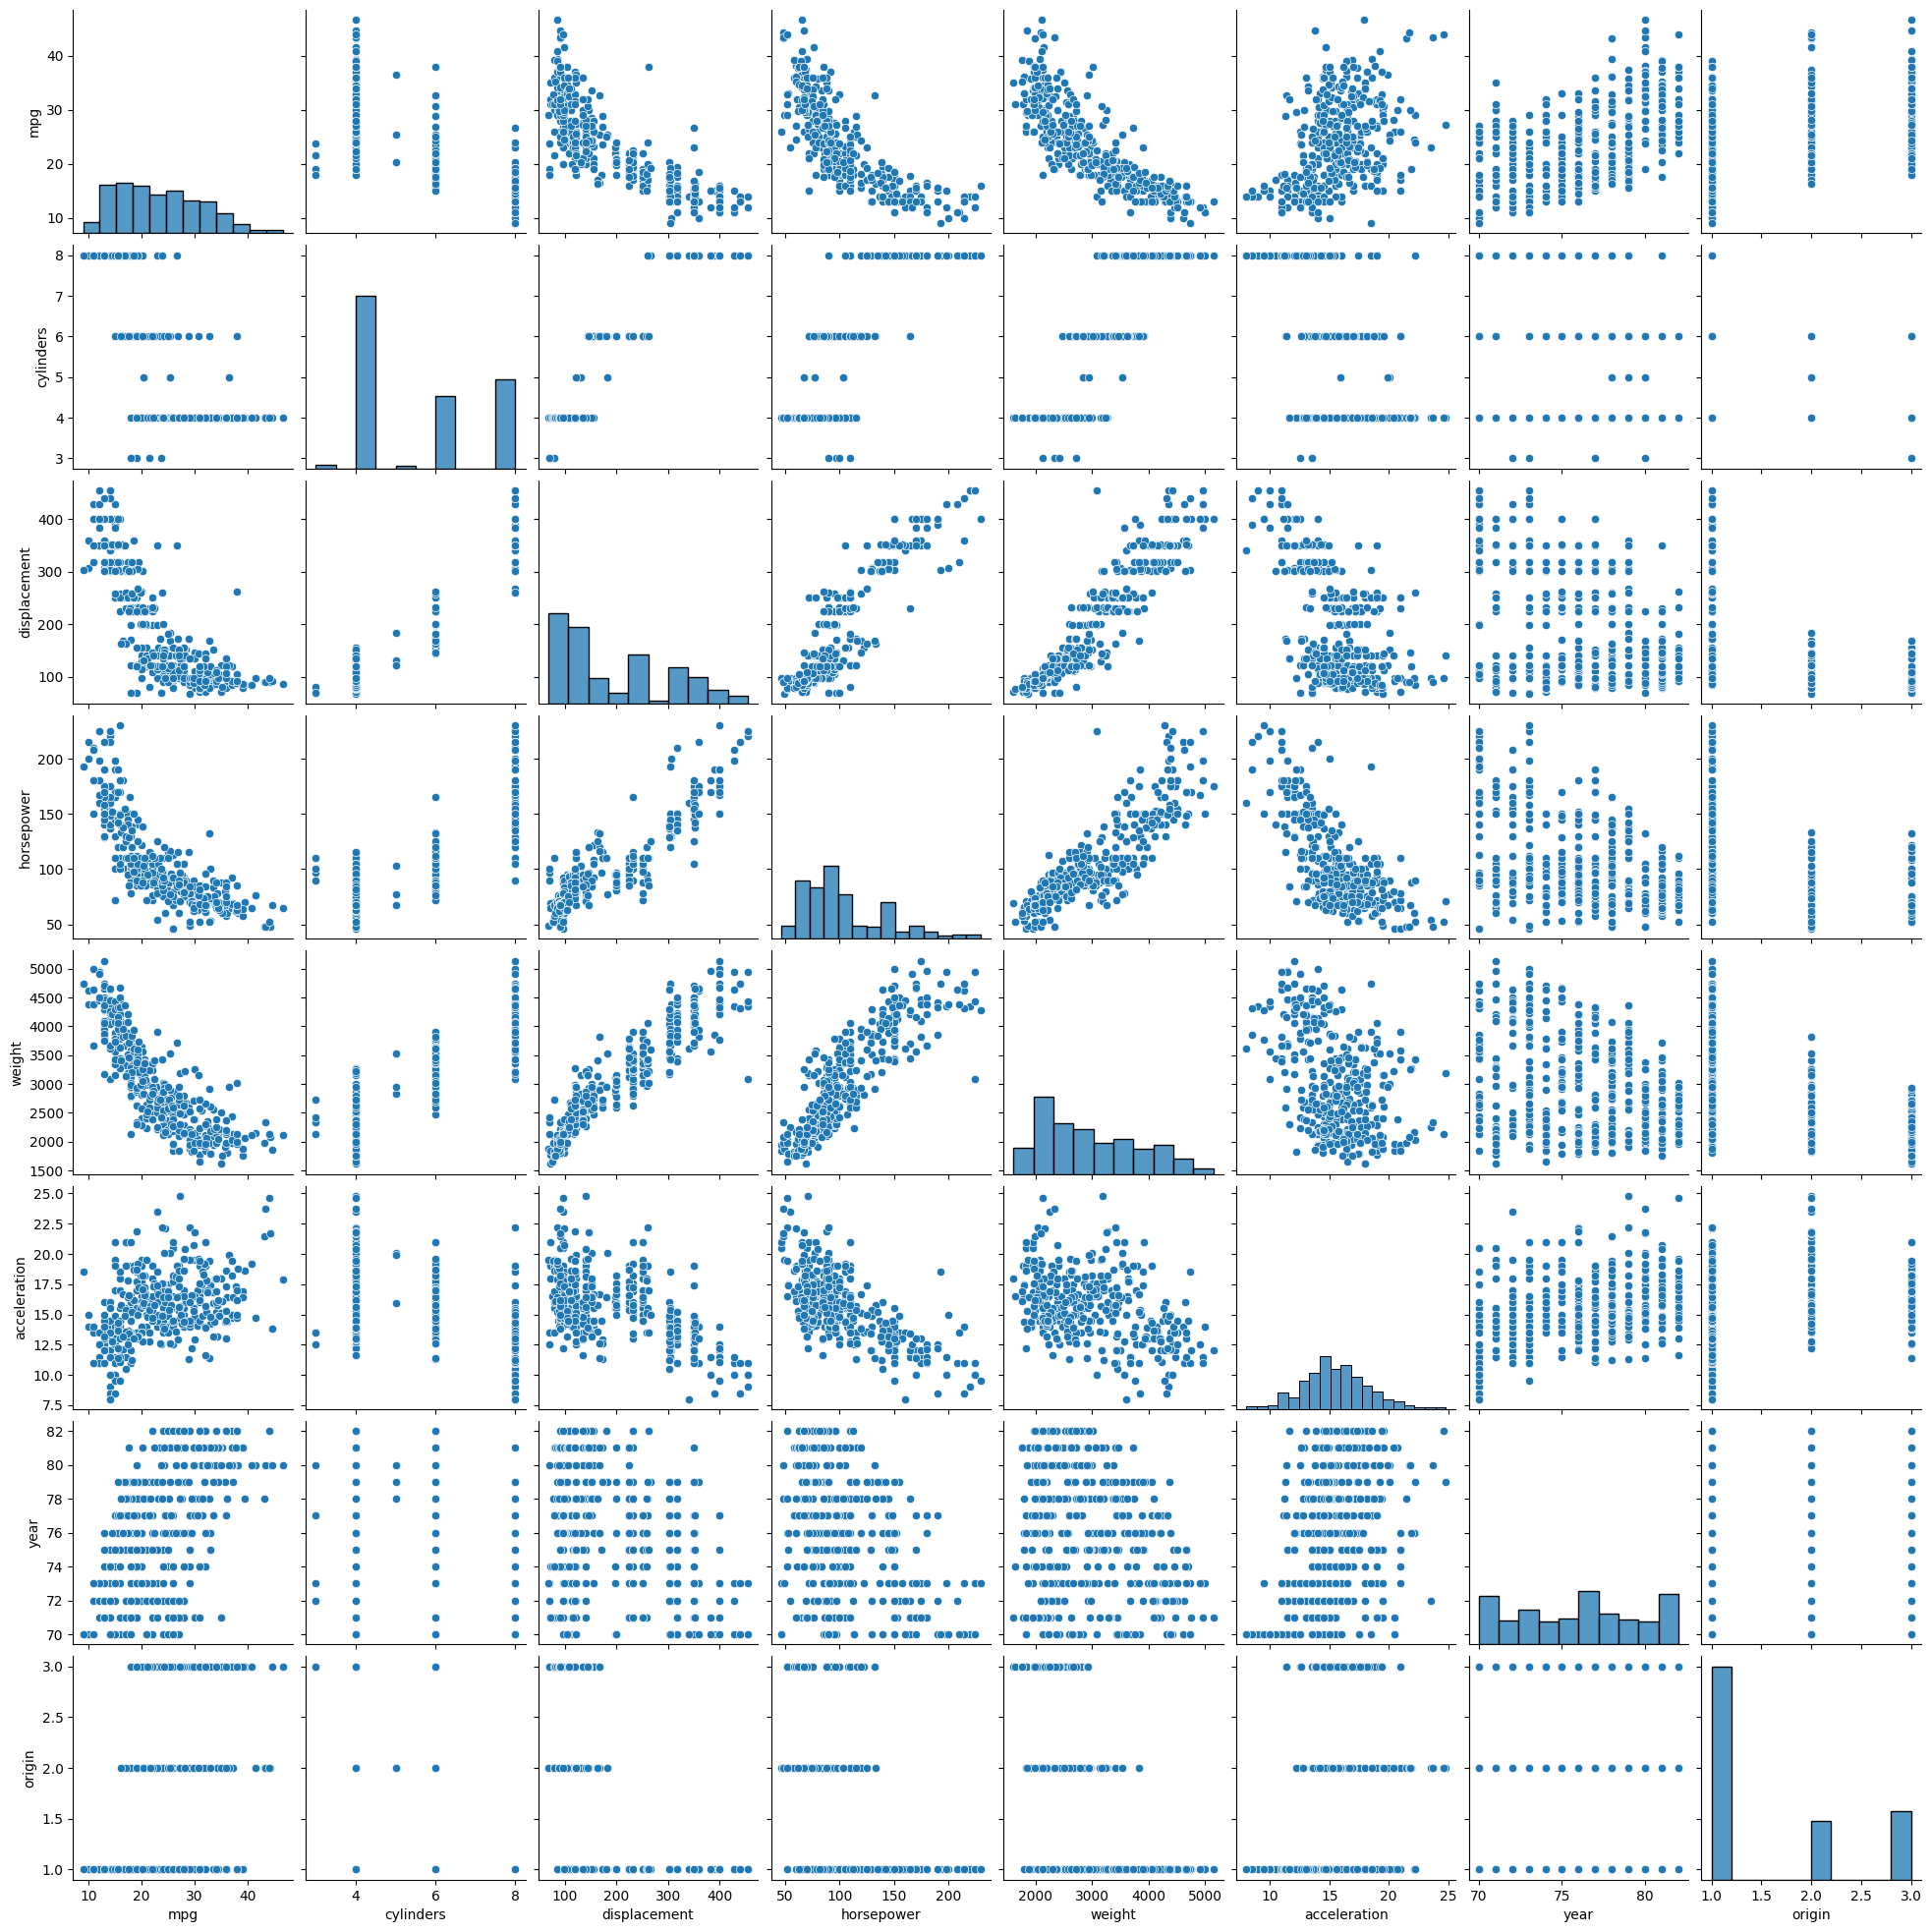

In [16]:
import seaborn as sns
sns.pairplot(Auto)

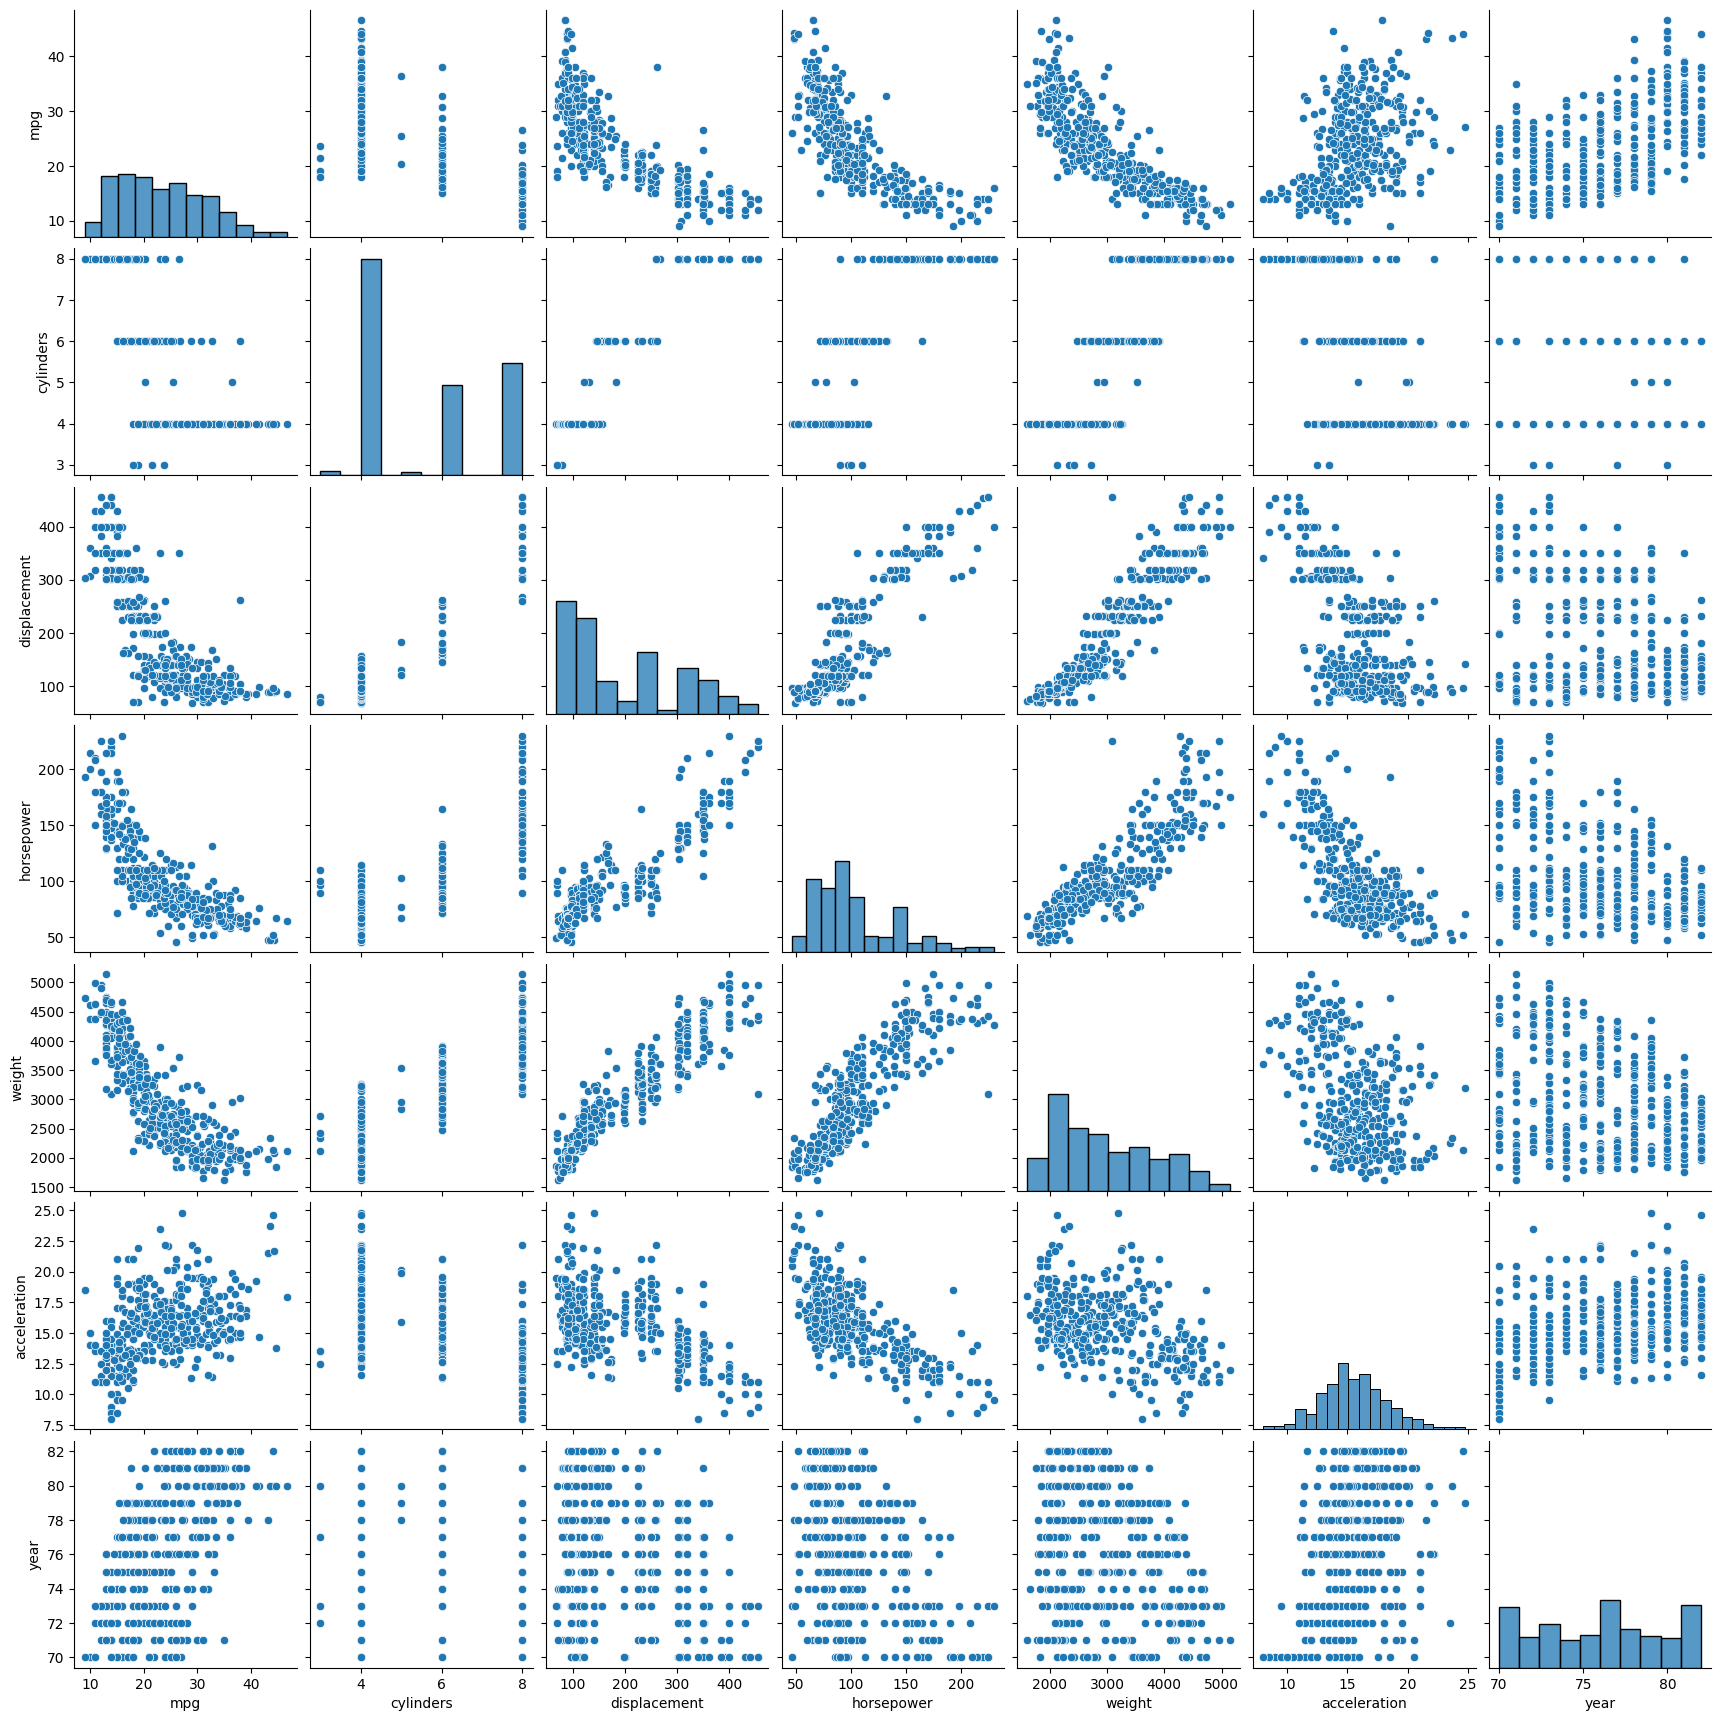

In [17]:
sns.pairplot(Auto_quant)

The plot shows that as the number of cylinders, displacement, horsepower, and weight grow, mpg tends to decrease, there is a negative correlation between these factors and fuel efficiency. However, there's a slight positive correlation between acceleration time and mpg. Over the years, there's a mild indication of an increase in mpg. The relationship between mpg and origin is unclear.

### (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer. 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# One-hot encoding of categorical variables
Auto_ = pd.get_dummies(Auto, columns=['origin'], drop_first=True)
Auto_.fillna(Auto_.median(), inplace=True)

X = Auto_.drop('mpg', axis=1)
y = Auto_['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 11.04
R^2 Score: 0.81


In [19]:
# the parameters of the linear regression model
model.coef_,model.intercept_

(array([-0.47473409,  0.02135442, -0.0093759 , -0.00675948,  0.09806596,
         0.80890588,  2.93087466,  2.84200673]),
 -21.064023315261668)

### 5. Suppose we have a data set with five predictors, 𝑋1= GPA, 𝑋2 = IQ, 𝑋3= Gender (1 for Female and 0 for Male), 𝑋4 = Interaction between GPA and IQ, and 𝑋5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model and get $\beta_0$ = 50, $\beta_1$ = 20, $\beta_2$ = 0.07, $\beta_3$ = 35, $\beta_4$ = 0.01, $\beta_5$ =−10. 


#### S = 50+20X<sub>1</sub> +0.07X<sub>2</sub>+35X<sub>3</sub>+0.01X<sub>4</sub>-10X<sub>5</sub>

### (a) Which answer is correct? Why? 
i. For a fixed value of IQ and GPA, males earn more, on average, than females. \
ii. For a fixed value of IQ and GPA, females earn more, on average, than males. \
iii. For a fixed value of IQ and GPA, males earn more, on average, than females provided that the GPA is high enough. 
iv. For a fixed value of IQ and GPA, females earn more, on average, than males provided that the GPA is high enough. 


For male (X<sub>3</sub>=0) : S = 50+20X<sub>1</sub>+0.07X2<sub>2</sub>+0.01X<sub>4</sub>\
For female （X<sub>3</sub>=1）: S = 50+20X<sub>1</sub>+0.07X<sub>2</sub>+35+0.01X<sub>4</sub>-10X<sub>1</sub>X<sub>3</sub>\
iii is correct This is because the interaction term -10X<sub>5</sub> will have a larger negative impact on women's starting salary as the GPA increases.


### (b)	Predict the salary of a female with IQ of 110 and a GPA of 4.0. 

$\hat{S}$ =50+20×4.0+0.07×110+35+0.01×4.0×110-10×4.0×1=137.1

### (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer. 


True ,Given the small coefficient, likely lack of significance, minimal impact, and unnecessary complexity, the interaction term probably does not significantly affect the model’s predictions.

## 6. This problem focuses on the multicollinearity problem. Assume three variables 𝑋1, 𝑋2, and 𝑌 have the following relationship: 
𝑋1~Uniform[0,1]\
𝑋2 = 0.5𝑋1 + 𝜖/10               where 𝜖~𝑁(0,1)\
𝑌= 2 + 2𝑋1 + 0.3𝑋2+ 𝑒   where 𝑒~𝑁(0,1)

### (a) Simulate a data set with 100 observations of the three variables, and then answer the following questions using the simulated data.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(0)

X1 = np.random.uniform(0, 1, 100) # X1 ~ Uniform[0,1]
X2 = 0.5 * X1 + np.random.normal(0, 1, 100) / 10 # X2 = 0.5*X1 + epsilon/10
Y = 2 + 2 * X1 + 0.3 * X2 + np.random.normal(0, 1, 100) # Y = 2 + 2*X1 + 0.3*X2 + epsilon

data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

In [21]:
data.head()

,X1,X2,Y
0,0.548814,0.157892,2.791001
1,0.715189,0.447677,2.189731
2,0.602763,0.347948,2.666293
3,0.544883,0.118817,0.902008
4,0.423655,0.360653,3.580737


### (b) compute the correlation between X1 and X2

Correlation between X1 and X2: 0.8192633558220391


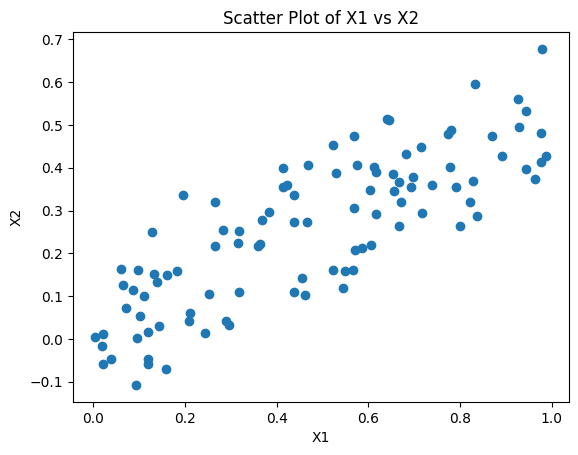

In [22]:
correlation = data['X1'].corr(data['X2'])
print("Correlation between X1 and X2:", correlation)

plt.scatter(data['X1'], data['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2')
plt.show()

### (c)Fit a least squares regression to predict Y using X1 and X2, and report the estimated coefficients and the R-squared value.

In [23]:
model_c = ols('Y ~ X1 + X2', data=data).fit()

print("Intercept (β0):", model_c.params['Intercept'])
print("Coefficient for X1 (β1):", model_c.params['X1'])
print("Coefficient for X2 (β2):", model_c.params['X2'])
print("R-squared value:", model_c.rsquared)

print("Can reject H0: beta1 = 0?", model_c.pvalues['X1'] < 0.05)
print("Can reject H0: beta2 = 0?", model_c.pvalues['X2'] < 0.05)

print(model_c.summary())




Intercept (β0): 1.9216645345431749
Coefficient for X1 (β1): 1.200679563435182
Coefficient for X2 (β2): 1.4931301701048334
R-squared value: 0.2613720369833845
Can reject H0: beta1 = 0? True
Can reject H0: beta2 = 0? False


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           4.16e-07
Time:                        21:33:42   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9217      0.191     10.071      0.0

### (d)predict Y using only X1

In [24]:
model_d = ols('Y ~ X1', data=data).fit()
print("Intercept (β0):", model_d.params['Intercept'])
print("Coefficient for X1 (β1):", model_d.params['X1'])
print("R-squared value:", model_d.rsquared)
print(model_d.summary())
print("Can reject H0: beta1 = 0?", model_d.pvalues['X1'] < 0.05)

Intercept (β0): 1.954834582148951
Coefficient for X1 (β1): 1.9378282262654367
R-squared value: 0.2440703162053095
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           1.76e-07
Time:                        21:33:42   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

### (e)predict Y using only X2

In [25]:
model_e = ols('Y ~ X2', data=data).fit()
print("Intercept (β0):", model_e.params['Intercept'])
print("Coefficient for X1 (β1):", model_e.params['X2'])
print("R-squared value:", model_e.rsquared)
print(model_e.summary())
print("Can reject H0: beta1 = 0?", model_e.pvalues['X2'] < 0.05)

Intercept (β0): 2.072056879191968
Coefficient for X1 (β1): 3.1254932653899834
R-squared value: 0.2305628362192168
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           4.29e-07
Time:                        21:33:42   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

### (f) Do the results obtained in (c)-(e) contradict each other? Explain your answer.

In [26]:
coefficients_c = model_c.params
coefficients_d = model_d.params
coefficients_e = model_e.params

print("Coefficients from Model c (Y ~ X1 + X2):")
print(coefficients_c)
print("\nCoefficients from Model d (Y ~ X1):")
print(coefficients_d)
print("\nCoefficients from Model e (Y ~ X2):")
print(coefficients_e)

print("\nComparing coefficients...")
if not np.isclose(coefficients_c['X1'], coefficients_d['X1'], atol=0.1):
    print("Coefficients for X1 differ significantly between Models c and d.")
if not np.isclose(coefficients_c['X2'], coefficients_e['X2'], atol=0.1):
    print("Coefficients for X2 differ significantly between Models c and e.")

print("\nChecking significance...")
print("X1 is significant in Model c:", model_c.pvalues['X1'] < 0.05)
print("X1 is significant in Model d:", model_d.pvalues['X1'] < 0.05)
print("X2 is significant in Model e:", model_e.pvalues['X2'] < 0.05)

Coefficients from Model c (Y ~ X1 + X2):
Intercept    1.921665
X1           1.200680
X2           1.493130
dtype: float64

Coefficients from Model d (Y ~ X1):
Intercept    1.954835
X1           1.937828
dtype: float64

Coefficients from Model e (Y ~ X2):
Intercept    2.072057
X2           3.125493
dtype: float64

Comparing coefficients...
Coefficients for X1 differ significantly between Models c and d.
Coefficients for X2 differ significantly between Models c and e.

Checking significance...
X1 is significant in Model c: True
X1 is significant in Model d: True
X2 is significant in Model e: True


The significant differences in coefficient estimates between models (c), (d), and (e) indicate that multicollinearity affects the stability of the coefficient estimates, suggesting that the presence of correlated predictors can lead to shared explanatory power and potentially overorunderestimating the effect of individual predictors.

### (g) Now suppose we obtain one additional observation (0.1, 0.8, 6) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           1.18e-07
Time:                        21:33:42   Log-Likelihood:                -142.48
No. Observations:                 101   AIC:                             291.0
Df Residuals:                      98   BIC:                             298.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9480      0.194     10.025      0.0

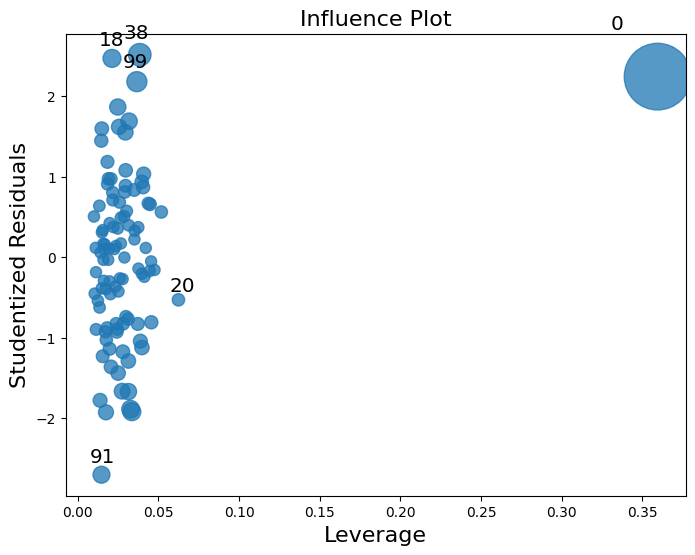

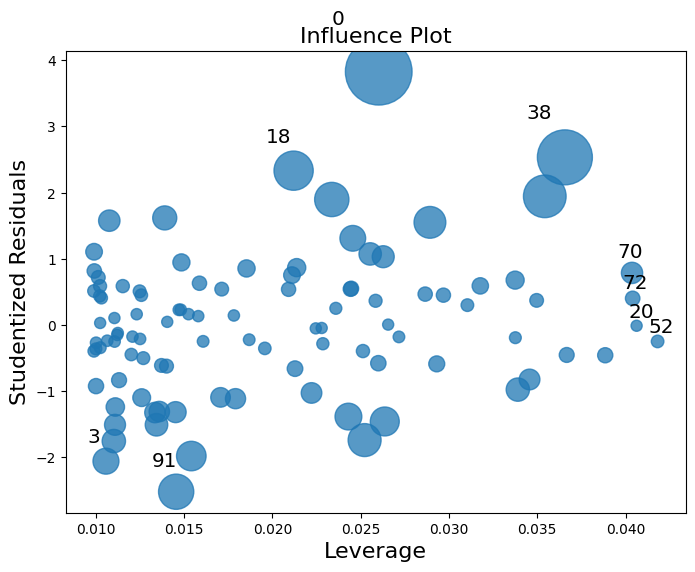

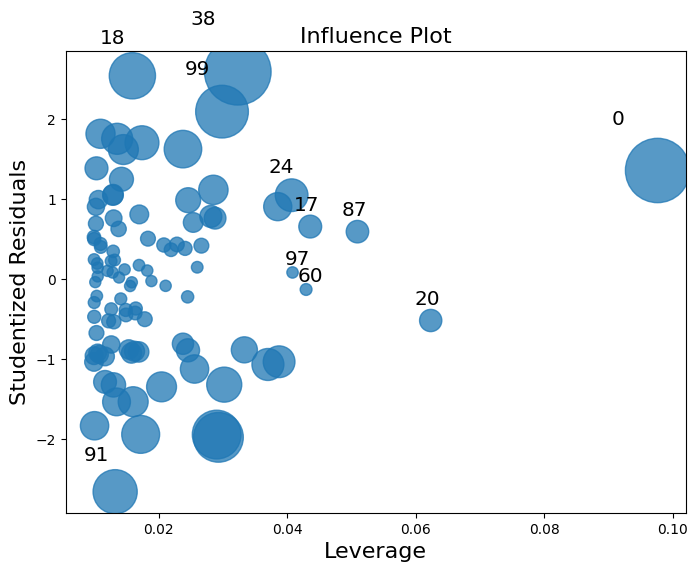

In [27]:
new_observation = {'X1': [0.1], 'X2': [0.8], 'Y': [6]}
new_data = pd.concat([data, pd.DataFrame(new_observation)])

# 重新拟合模型
model_cg = ols('Y ~ X1 + X2', data=new_data).fit()
print(model_cg.summary())

model_dg = ols('Y ~ X1', data=new_data).fit()
print(model_dg.summary())

model_eg = ols('Y ~ X2', data=new_data).fit()
print(model_eg.summary())

# an outlier or a high leverage point
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model_cg, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model_dg, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model_eg, ax=ax)
plt.show()

The new observation point has a low leverage value, which means it has a minimal impact on the overall predictive ability of the model.